<a href="https://colab.research.google.com/github/Nichika0617/BasicSeminar/blob/main/BasicSeminar10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 使用するデータセット

Housingデータセット

* CRIM
  * 犯罪発生率(人口単位)
* ZN
  * 25,000 平方フィート以上の住宅区画の割合
* INDUS 
  * 非小売業の土地面積の割合(人口単位)
* CHAS 
  * チャールズ川沿いかどうか(チャールズ川沿いの場合は 1 、そうではない場合は 0)
* NOX 
  * 窒素酸化物の濃度(pphm 単位)
* RM 
  * 1 戸あたりの平均部屋数
* AGE 
  * 1940 年よりも前に建てられた家屋の割合
* DIS 
  * ボストンの主な 5 つの雇用圏までの重み付きの距離
* RAD 
  * 幹線道路へのアクセス指数
* TAX 
  * 10,000 ドルあたりの所得税率
* PTRATIO 
  * 教師 1 人あたりの生徒の数(人口単位)
* B 
  * $1000(Bk – 0.63)^2$ として計算:Bk はアフリカ系アメリカ人居住者の割合(人口単位) 10
* LSTAT 
  * 低所得者の割合
* MEDV 
  * 住宅価格の中央値(単位 1,000 ドル)

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

print(f'行数{len(df)}，列数{len(df.columns)}')
print()

df.head()


行数506，列数14



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 前節の結果
P287

Slope: 9.102
Intercept: -34.671


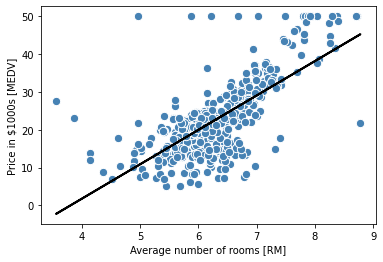

In [2]:


import matplotlib.pyplot as plt

X = df[['RM']].values
y = df['MEDV'].values

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)
      
X = df[['RM']].values
y = df['MEDV'].values

from sklearn.preprocessing import StandardScaler
import numpy as np

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)
# Slope: 9.102
# Intercept: -34.671

lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#plt.savefig('images/10_07.png', dpi=300)
plt.show()



部屋の数と住宅価格の相関が高い．

ただし、部屋数だけでは説明しきれない場合が多いことも読み取れる．
(y=50 でデータ列が一列に並んでいる．50で打ち切られている？上限は50?であることもわかる．)

___
# 10.4

### RANSACを使ったロバスト回帰モデルの学習
P288

RANSACアルゴリズムと線形モデルを組み合わせる．


In [3]:
import numpy as np

from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100,  # RANSACのイテレーションの最大数を100に設定
                         min_samples=50,  # ランダムに選択される訓練データの最小数を50に設定
                         #loss='absolute_loss',  # 学習直線に対する訓練データの縦の距離の絶対値を計算
                         #  FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent. 
                         loss='absolute_error',  # 学習直線に対する訓練データの縦の距離の絶対値を計算
                         residual_threshold= 5.0,  # ランダムサンプルから学習したモデルとの残差がこれ以内であれば「正常値」とみなす
                         random_state=0)


ransac.fit(X, y)



RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5.0)

 RANSACRegressor のイテレーションの最大数を 100 に設定している．
 
 min_samples=50 により， ランダムに選択される訓練データの最小数を 50 に設定している．
 
loss パラメータへの引数と して 'absolute_loss' を指定することで，学習直線に対する訓練データの縦の距離の絶対値を計算させている．
 
residual_threshold の引数に 5.0 を指定することでランダムサンプルから学習したモデルとの残差が5以内であれば「正常値」とみなす．

>「誤差」と、「残差」は似ているように見えますが、異なる意味を持ちます。「誤差」は求めようとする真の回帰式から算出される値と実際のデータとの差を表します。真の回帰式はあくまでも理論的なものであるため、誤差を計算で求めることはできません。一方の「残差」は実際のデータを用いて推定された回帰式から算出される値と実際のデータとの差を表します。誤差とは異なり残差は計算で求められます。[予測値と残差]

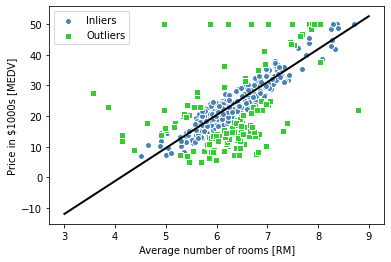

In [4]:

inlier_mask = ransac.inlier_mask_ # 正常値を表す真偽値を取得
outlier_mask = np.logical_not(inlier_mask) #  外れ値をあわらす真偽値を取得
line_X = np.arange(3, 10, 1) #  3 ~ 9までの整数値
line_y_ransac = ransac.predict(line_X[:, np.newaxis]) # 予測値を計算

# 正常値をプロット
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
# 外れ値をプロット
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
# 予測値をプロット
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

plt.show()


この図は，横軸に部屋の数，縦軸に住宅価格を取り，プロットしたものである．

青い円が正常値と判断されたもので，緑の正方形が外れ値と判断されたものである．

線形回帰モデルは検出された正常値(青い円)に適合していることがわかる．

###  RANSAC 無編集時の結果



 ![RANSAC 無変更時の結果](https://drive.google.com/uc?export=view&id=1XuLRZM2a3zBLNA9dM55ME4KD-sN8VQlM)

____
### RANSACを使った結果の傾きと切片を出力

In [5]:
print("RANSACを使った線形回帰直線")
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

print("_______________\n前節でRANSACを使わずに出力した線形回帰直線")
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)


RANSACを使った線形回帰直線
Slope: 10.735
Intercept: -44.089
_______________
前節でRANSACを使わずに出力した線形回帰直線
Slope: 9.102
Intercept: -34.671


> * Slope (傾き)
* Intercept(切片)

RANSACを使わない結果と，線形回帰直線が少し異なる．

RANSACを使ったことでこのデータセットの外れ値の影響は抑えられたが，この手法が未知のデータの予測にプラスに働くかどうかは分からない．そこで，回帰モデルを様々な手法で評価する方法を学ぶ．


# 10.5
### 線形回帰モデルの性能評価 
P290

* モデルの汎化性能
  * 訓練に使われなかったデータでモデルをテストすることが不可欠．

* データセットを訓練データセットとテストデータセットに分割．
  * 訓練データセットはモデルの学習に使う．  
  * テストデータセットは汎化性能を推定するために未知のデータに対する評価に使う．

ここでは，データセットの変数を全て使った重回帰モデルを訓練する．

In [6]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

複数の説明変数を使ったため，線形回帰直線(正確には超平面)を2次元のグラフとしてプロットすることはできない．

しかし，線形回帰モデルを訓練するために，予測された値に対する残差(実際の値と予測された値の差，または縦の距離)をプロットすることは可能．

その残差プロット(residual plot)は，回帰モデルを診断して非線形性や外れ値を検出し，誤差がランダムに分布しているかどうかをチェックするグラフィカルな解析によく使われている．

### 線形回帰モデルの3つの仮定
1. 誤差の期待値は0である．
2. 誤差は互いに無相関である．
3. 誤差の分散は等しい．


データにモデルを適合させた後に，残差がこれらの条件を満たしているかどうかの確認は，データ解析の定石である．

### 残差プロットを作成する．

ここでは，

目的変数の予測値 - 正解値

を行っている．

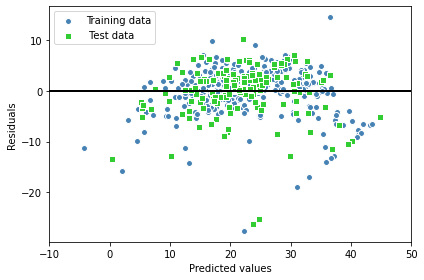

In [7]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')

plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label=' Test data ')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()


plt.show()

この図は，横軸が予測値，縦軸が残差(その値の正解値との差)を表している

式は，予測値 - 正解値 であったので，Y軸の正の値の残差は，予測が高すぎることを示し，負の値は予測が低すぎることを示している．

予測が完璧である場合，残差はちょうど0になるが，現実ではほぼないといわれている．

理想的な残差プロット
* 分布が対照的でプロットの中央に向かってクラスタを形成する．
* Y軸の1桁台の小さい値の範囲にクラスタが形成される．
* 明確なパターンがない

良い回帰モデルでは，誤差がランダムに分布し，残差が中央の直線の周りにランダムに散らばる．

残差プロットにパターンが見られる場合は，このモデルが何らかの説明情報を捕捉できていないことを意味する．

中央の直線から大きく離れている点は外れ値であり，残差プロットを使って外れ値を検出することもできる．

右下に変な直線のプロットがあり，これは住宅価格の上限が50で固定されていることが原因だと思われる．




### 平均二乗誤差

MSE : Mean Squared Error

$MSE = \frac{1}{n} \sum^{n}_{i=1} (y^{(i)} - \hat y^{(i)})^{2}$

実際の値と予測値の差の2乗を計算し，その総和を取り，データの総数で割った値．

→値が小さいほど誤差が小さい

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 平均二乗誤差を出力
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))


MSE train: 19.958, test: 27.196


訓練データセットのMSEが19.96で，テストデータセットでのMSEが27.2と，訓練データセットよりもかなり大きい．

この値はこのモデルが訓練データを過学習していることを表している．

過学習しているため，テストデータに対して予測を間違うことが多く，誤差がかなり大きくなってしまっている．

### 決定係数 $ R^2$

* モデルの性能をより効果的に解釈できるようにするための，標準化されたMSE(平均二乗誤差)

* データに対するモデルの当てはまりの良さ（度合い）を表す．

* 1に近いほど、モデルが実際のデータに当てはまっていることを表し，説明変数が目的変数をよく説明しているということになる．[決定係数と重相関係数](https://bellcurve.jp/statistics/course/9706.html)


\begin{equation}
  R^2 = 1 - \frac{MSE}{Var(y)}
\end{equation}

$R^2$は範囲は0~1の値を取る．

In [9]:

# R ^ 2(決定係数) のスコアを出力
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))



R^2 train: 0.765, test: 0.673


訓練データを使った評価では，モデルの$R^2$は0.765であり，そこまで悪くはない．

テストデータセットでの$R^2$は0.673となっており，訓練データと比べ，少しモデルがデータに当てはまっていないということが分かる．


$R^2$ は0.5以上であれは精度は高いということができ，0.8以上であれば非常に高いといえる．
[[相関と回帰について]](https://www.google.com/search?q=%E6%B1%BA%E5%AE%9A%E4%BF%82%E6%95%B0+%E3%81%A9%E3%82%8C%E3%81%8F%E3%82%89%E3%81%84&rlz=1C5CHFA_enJP846JP848&ei=JSKPYoypN5iS-Abel66ADQ&ved=0ahUKEwjMz7vWyPz3AhUYCd4KHd6LC9AQ4dUDCA4&uact=5&oq=%E6%B1%BA%E5%AE%9A%E4%BF%82%E6%95%B0+%E3%81%A9%E3%82%8C%E3%81%8F%E3%82%89%E3%81%84&gs_lcp=Cgdnd3Mtd2l6EAMyBQgAEIAEMggIABAeEA8QBToHCAAQRxCwAzoICAAQsQMQgwE6BAgAEEM6BwgAEIAEEAQ6BggAEB4QBUoECEEYAEoECEYYAFDlAljhDGDMEGgBcAF4AIABsQGIAb4LkgEEMC4xMJgBAKABAcgBCsABAQ&sclient=gws-wiz#:~:text=%E3%81%93%E3%81%AE%E6%B1%BA%E5%AE%9A%E4%BF%82%E6%95%B0%E3%81%8C%E3%81%A9%E3%82%8C%E3%81%8F%E3%82%89%E3%81%84%E3%81%82%E3%82%8C%E3%81%B0%E3%82%88%E3%81%84%20%E3%81%8B%E3%81%A8%E3%81%84%E3%81%86%E5%8E%B3%E5%AF%86%E3%81%AA%E5%9F%BA%E6%BA%96%E3%81%AF%E3%81%AA%E3%81%84%E3%81%8C%E3%80%81%E7%A4%BE%E4%BC%9A%E4%BA%8B%E8%B1%A1%E3%81%AE%20%E5%A0%B4%E5%90%88%E3%81%AB%E3%81%AF%E3%80%810.5%20%E4%BB%A5%E4%B8%8A%E3%81%A7%E3%81%82%E3%82%8C%E3%81%B0%E6%A6%82%E3%81%AD%E7%B2%BE%E5%BA%A6%E3%81%8C%E9%AB%98%20%E3%81%8F%E3%80%810.8%20%E4%BB%A5%E4%B8%8A%E3%81%A7%E3%81%82%E3%82%8C%E3%81%B0%E9%9D%9E%E5%B8%B8%E3%81%AB%E7%B2%BE%E5%BA%A6%E3%81%8C%E9%AB%98%E3%81%84%E3%81%A8%20%E3%81%84%E3%81%88%E3%82%8B%E3%80%82)

### RANSACを使ったものではどうか・・？

In [26]:

ransac_test = RANSACRegressor(LinearRegression(), 
                         max_trials=100,  # RANSACのイテレーションの最大数を100に設定
                         min_samples=50,  # ランダムに選択される訓練データの最小数を50に設定
                         loss='absolute_loss',  # 学習直線に対する訓練データの縦の距離の絶対値を計算
                         residual_threshold= 5.0,  # ランダムサンプルから学習したモデルとの残差がこれ以内であれば「正常値」とみなす
                         random_state=0)


ransac_test.fit(X_train, y_train)

ransac2_train_pred = ransac_test.predict(X_train)
ransac2_test_pred = ransac_test.predict(X_test)


print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, ransac2_train_pred),
        r2_score(y_test, ransac2_test_pred)))


R^2 train: 0.711, test: 0.574


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,


RANSACを使ったものの結果はresidual_threshold= 5.0の時，
```
R^2 train: 0.711, test: 0.574
```

と，全てのデータを学習した LinearRegression()よりも低くなっている．

また．residual_thresholdを大きくしていくとtestの結果も良くなっていく．そのことから今回のデータセットは外れ値のように見えるデータでも何かしら予測に必要な要素を持っており，全てのデータ，説明変数を使用した方が良いのではないかと思われる．



___
# 10.6
### 回帰に正則化手法を使う
P293

### リッジ回帰モデル

\begin{equation}
  J(w)_{Ridge} = \sum^{n}_{i=1} (y^{(i)} - \hat y^{(i)})^2 + \lambda ||w||^{2}_{2}
\end{equation}


正則化の強さはハイパーパラメータである$\alpha$パラメータによって制御される．モデルの精度を見ながら変更を行う．


リッジ回帰モデルを初期化するコードは次のようになる．



In [11]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) # L2ペナルティ項の影響度合いを表す値を引数に指定

### LASSO
\begin{equation}
  J(w)_{LASSO} = \sum^{n}_{i=1} (y^{(i)} - \hat y^{(i)} )^{2} + \lambda ||w||_{1}  
\end{equation}


正則化の強さは リッジ回帰と同様にalphaパラメータによって制御される．

正則化の強さによっては，特定の変数の重みが0になることがある．
このため，LASSOは教師ありの特徴量選択の手法としても役立つ

linear_modelサブモジュールのLASSO回機器を初期化するコードも同様である．



In [12]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)


___
### Elastic Net

* リッジ回帰とLASSOを合成した手法．
* LASSOと同じように，Elastic Netでは，ゼロ値の係数を生成することにより，次元削減されたモデルを生成できる．


\begin{equation}
  J(w) _{Elastic Net} = \sum^{n}_{i=1} (y^{(i)} - \hat y^{(i)})^{2} + \lambda _{1} \sum^{m}_{j=1} w^{2}_{j} + \lambda _{2} \sum^{m}_{j=1}|w_{j}| 
\end{equation}


* パラメータ alpha
  * パラメータの学習に制限をかけ，過学習を防ぐ仕組みがあり，その制限をかけるための係数．float値，デフォルト値は1.0
  * 高いほど制限が強くかかる．
* パラメータ l1_ratio
  * L1とL2の比率を変える．float値，デフォルト値は0.5．$ 0 \leq $ l1_ratio $ \leq 1.0 $
  * 大きくするとL1側に近づく．
  (Redge回帰はL2ペナルティを使い，LASSOはL1ペナルティを使う．L1_ratio(L1の割合)を大きくするとLASSOに近づく．)



In [13]:
from sklearn.linear_model import ElasticNet


elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

___
### 実際に動きを確認する

#### Redge回帰

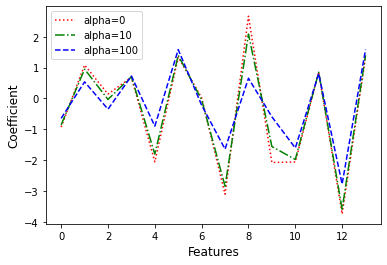

In [14]:


from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT','RM']].values # 説明変数を力づくでいれる

y = df['MEDV'].values # 目的変数

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# slr = LinearRegression()
# slr.fit(X_train, y_train)

X = StandardScaler().fit_transform(X)
clf1 = LinearRegression().fit(X, y)
clf2 = Ridge(alpha=10).fit(X, y) # L2ペナルティの度合い alpha
clf3 = Ridge(alpha=100).fit(X, y)

plt.plot(clf1.coef_, label='alpha=0', color='r', linestyle=':')
plt.plot(clf2.coef_, label='alpha=10', color='g', linestyle='-.')
plt.plot(clf3.coef_, label='alpha=100', color='b', linestyle='--')
# coef_ : 偏回帰係数 (各説明変数の係数のこと)
# 重回帰分析という複数の独立変数を用いて従属変数を表す回帰分析において
# 回帰式の中に現れる傾きを表す係数のこと
# 重みとも呼ばれ、幾何学的には直線の傾きに相当する
# 偏回帰係数という言葉における「偏」という意味は
# 他の独立変数の影響を除外した場合のその変数の重みという意味で用いられる

#  (大きい方が，目的変数に与える影響が大きい，影響力が強い．？)

plt.xlabel('Features', fontsize=12) # 特徴量
plt.ylabel('Coefficient', fontsize=12) # 係数
plt.legend();




この図は，x軸がそれぞれの特徴量，y軸が偏回帰係数(それぞれの説明変数にかかる係数)を表している．8の特徴量RAD(高速道路へのアクセスのしやすさ)が重みの大きなものとなっている事がわかる．
> * RAD 
   * 幹線道路へのアクセス指数

そして，alphaの値を大きくするほど強い正則化となるため，中央によっていることが分かる．

偏回帰係数がマイナスになったからといって重回帰分析がおかしいとすぐには言えない．

合理的に考えてマイナスになるべきであれば間違っていない．

12番目の値であるLSTATは低所得者の割合．低所得者の割合は低いほど住宅価格は高くなることはおかしくはない．
 
> * LSTAT 
  * 低所得者の割合

しかし，本来偏回帰係数がプラスになると想定していたのにマイナスになった場合は多重線形性が原因でないかどうか検討する必要がある．

In [15]:
coef_df = pd.DataFrame({'clf1_線形回帰': clf1.coef_,
                                      'clf2_alpha=10': clf2.coef_,
                                      'clf3_alpha=100': clf3.coef_},
                       index=df.columns)
coef_df

,clf1_線形回帰,clf2_alpha=10,clf3_alpha=100
CRIM,-0.928146,-0.857962,-0.646174
ZN,1.081569,0.947056,0.535768
INDUS,0.140900,-0.034163,-0.349578
CHAS,0.681740,0.706417,0.724858
NOX,-2.056718,-1.806336,-0.899022
RM,1.337115,1.396213,1.581379
AGE,0.019466,-0.044333,-0.220485
DIS,-3.104044,-2.847704,-1.643658
RAD,2.662218,2.084731,0.651830
TAX,-2.076782,-1.559600,-0.596310


実際にそれぞれの係数の値を出力するとこのようになっており，8個目のRAD(高速道路へのアクセスのしやすさ)の重みの大きさはこの表からも分かる．

正則化を強くしたclf3は値が小さくなっていることも分かる．

#### LASSO

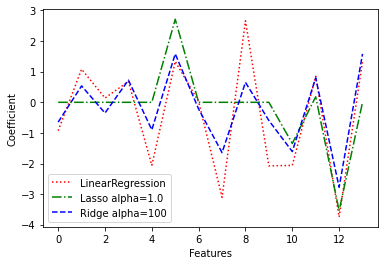

In [38]:
from sklearn.linear_model import Lasso

Lasso_alpha = 1.0
clf5 = Lasso(alpha=Lasso_alpha).fit(X, y)

plt.plot(clf1.coef_, label='LinearRegression', color='r', linestyle=':')
plt.plot(clf5.coef_, label='Lasso alpha=' + str(Lasso_alpha), color='g', linestyle='-.')
plt.plot(clf3.coef_, label='Ridge alpha=100', color='b', linestyle='--')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Coefficient', fontsize=10)
plt.legend();

緑色の線がLASSOの結果である．

LASSOの特徴であった，特徴量の回帰係数が０になっている部分があることが確認できる．

重回帰分析(LinerRegression)やリッジ回帰(Ridge)と比べ，よりシンプルで分かりやすいモデルであると言える．



In [39]:
coef_df = pd.DataFrame({'clf5': clf5.coef_},
                       index=df.columns)
coef_df

,clf5
CRIM,-0.000000
ZN,0.000000
INDUS,-0.000000
CHAS,0.000000
NOX,-0.000000
RM,2.713355
AGE,-0.000000
DIS,-0.000000
RAD,-0.000000
TAX,-0.000000


実際にそれぞれの値を出力するとこのようになっており，ほとんどの説明変数の係数が0になっている．
RM(1戸当たりの「平均部屋数」)や，LSTAT(低所得者人口の割合)が重要な変数であることがわかる．

しかし，Redge回帰で重要であると思われたRAD(幹線道路へのアクセスのしやすや)も0になってしまっている．

####  LASSO 無編集時の結果



![LASSOの結果](https://drive.google.com/uc?export=view&id=1o_84UWTdifzMjUl9uVGEzUsu0pjNWc3a)

#### まとめ


* Ridge回帰
  * 係数の値の大きさが発散してしまうのを防ぐ
  * 過学習を防ぐ
  * 特徴量の削減(係数を0にする)ことには向いてない
* Lasso回帰
  * 不要な特徴量を削る(次元削減)
  * 相関の高い特徴量をどちらも残すことができない

この二つの回帰の長所を合わせ持つのがElastic Net

#### Elastic Net

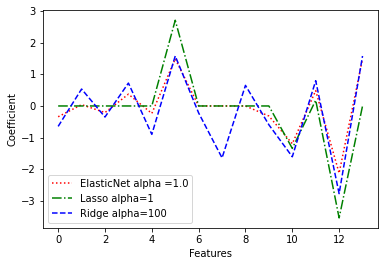

In [31]:
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

elanet_alpha = 1.0

clf6 = ElasticNet(alpha=elanet_alpha, l1_ratio=0.5).fit(X,y)

plt.plot(clf6.coef_, label='ElasticNet alpha =' + str(elanet_alpha), color='r', linestyle=':')
plt.plot(clf5.coef_, label='Lasso alpha=1', color='g', linestyle='-.')
plt.plot(clf3.coef_, label='Ridge alpha=100', color='b', linestyle='--')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Coefficient', fontsize=10)
plt.legend();

l1_ratioを1.0に設定すると，L2ペナルティがなくなるため，Elastic Net回機器はLASSO回機器と等しくなる．0 に向かって小さくすると，だんだんリッジ回帰に近づく．


実際にプロットすると，Elastic Netは リッジ回帰とLASSOの間にあるということが分かった．

5番目や12番目の特徴量の部分は，
Ridge回帰の係数の値の大きさが発散してしまうのを防ぐという特徴が現れており，LASSOのように発散せず，0によっている．

6．7番目の特徴量は削除することができており，LASSOの不要な特徴量を削る特徴も現れている．
 

※線形回帰の様々な実装については[scikit-learnの公式ドキュメント](https://scikit-learn.org/stable/modules/linear_model.html)に詳しい説明あり．

#### ElasticNet 無編集時の結果



![ElasticNet](https://drive.google.com/uc?export=view&id=1gNx4S0kS3DG9yCg2ynYjo7ExZYWWsIj1)

____

### Elastic Netを使って線形回帰LinearRegressionより良いモデルを作る．

* 回帰モデルの評価値は$R^2$を使う．

#### まず線形回帰．
 * 10.5のものと同じ．

In [19]:
# LinearRegression__________________________________

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X2 = df.iloc[:, :-1].values
y2 = df['MEDV'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=0)
slr = LinearRegression()

slr.fit(X2_train, y2_train)
slr_train_pred = slr.predict(X2_train)
slr_test_pred = slr.predict(X2_test)


# 線形回帰LinearRegressionの結果
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y2_train, slr_train_pred),
        r2_score(y2_test, slr_test_pred)))


R^2 train: 0.765, test: 0.673


#### 次にElastic Net回帰モデル
* 適切なハイパーパラメータを探索するためにクロスバリデーションを行った．

* ElasticNetCVというCV付きの関数を発見できた
[[API Reference]](https://scikit-learn.org/stable/modules/classes.html#:~:text=linear_model.ElasticNetCV(*%5B%2C%C2%A0l1_ratio%2C%C2%A0...%5D))．

In [20]:
# Elastic Net________________________________________
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
import numpy as np


ela_alphas = np.arange(0.1, 10, 0.1) # 0.1から10まで公差0.1


# ela_l1_ratio = np.linspace(0, 1, 0.1) 
# 'float' object cannot be interpreted as an integer 公差は整数のみ
ela_l1_ratio = np.arange(1, 100, 1) / 100 # 0から1まで公差0.01 
# 0, 1, 2, 3, → 0,  0.01, 0.02, 0.03


ela_regressor = ElasticNetCV(alphas= ela_alphas,
                          l1_ratio=ela_l1_ratio,
                          cv = 10)

#  ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 
# 収束しない，反復回数増やす．  

# Cannot have number of splits n_splits=1000 greater than the number of samples: n_samples=354.
# 354が最大


ela_regressor.fit(X2_train, y2_train)


print('正則化パラメータalpha:',ela_regressor.alpha_)
print('L1の割合:',ela_regressor.l1_ratio_)


ela_train_pred = ela_regressor.predict(X2_train)
ela_test_pred = ela_regressor.predict(X2_test)

# Elastic Netの結果
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y2_train, ela_train_pred),
        r2_score(y2_test, ela_test_pred)))



正則化パラメータalpha: 0.1
L1の割合: 0.01
R^2 train: 0.750, test: 0.652


結果

正則化パラメータalpha: 0.1

L1の割合: 0.01

R^2 train: 0.750, test: 0.652
___
#### Ridge回帰だとどうなるか．

* RedgeCV


In [21]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
import numpy as np

r_alphas = np.arange(0.1, 10, 0.1) # 0.1から10まで公差0.1

r_cv = RidgeCV(alphas=r_alphas,cv = 10)

r_cv.fit(X2_train, y2_train)


print('正則化パラメータalpha:',r_cv.alpha_)


r_train_pred = r_cv.predict(X2_train)
r_test_pred = r_cv.predict(X2_test)

# Elastic Netの結果
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y2_train, r_train_pred),
        r2_score(y2_test, r_test_pred)))



正則化パラメータalpha: 0.2
R^2 train: 0.764, test: 0.672


alphaをより細かく．


In [22]:
r2_alphas = np.arange(0.1, 10, 0.001) # 0.1から10まで公差0.001

r2_cv = RidgeCV(alphas=r2_alphas,cv = 10)

r2_cv.fit(X2_train, y2_train)


print('正則化パラメータalpha:',r2_cv.alpha_)


r2_train_pred = r2_cv.predict(X2_train)
r2_test_pred = r2_cv.predict(X2_test)

# Redge回帰の結果
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y2_train, r2_train_pred),
        r2_score(y2_test, r2_test_pred)))


正則化パラメータalpha: 0.18700000000000008
R^2 train: 0.764, test: 0.672


#### グラフ化
残差プロット

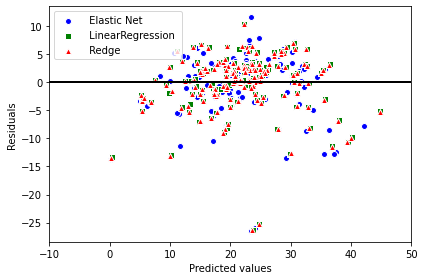

In [23]:
# グラフ化する


plt.scatter(ela_test_pred,  ela_test_pred  - y_test,
            c='b', marker='o', edgecolor='white',
            label=' Elastic Net')

plt.scatter(slr_test_pred,  slr_test_pred - y_test,
            c='g', marker='s', edgecolor='white',
            label=' LinearRegression ')


plt.scatter(r2_test_pred,  r2_test_pred  - y_test,
            c='r', marker='^', edgecolor='white',
            label=' Redge ')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()


plt.show()


今回の様々なモデル作成とその決定係数の結果をまとめると，
```
* LinearRegression
  
  R^2 train: 0.765, test: 0.673

* Elastic Net
  
  正則化パラメータalpha: 0.1，L1の割合: 0.01
  
  R^2 train: 0.750, test: 0.652

* Redge回帰

  正則化パラメータalpha: 0.18700000000000008

  R^2 train: 0.764, test: 0.672
```

このような結果であった．


実際にプロットしてみると，LinearRegressionとRedge回帰はほとんど似た結果であることがグラフからも分かる．

試行錯誤してもあまり結果を伸ばすことのできなかった青い円でプロットされているElastic Netは少し離れた箇所にプロットされているものが多いことが分かる．

Elastic Netのクロスバリデーションの結果がL1_ratio = 0.01とほぼRedge寄りになっていた
> (Redge回帰はL2ペナルティを使い，LASSOはL1ペナルティを使う．L1_ratio(L1の割合)を大きくするとLASSOに近づく．L1_ratio(L1の割合)が小さいということはLASSOの割合が小さい．つまりほぼRedge回帰)


ことから，この分類にはLASSOはあまり向いておらずRedge回帰とLASSOを足し合わせたElasticNetのLASSOの部分が結果を下げる原因となっていたと考えられる．

ElasticNetはRedge回帰とLASSOの長所を持ち合わせた一番良いものであるように思えるが，器用貧乏なモデルでもあり，まずRedge回帰とLASSOを使って良い結果が得られないようであればその二つの結果を見ながらパラメータを調節し，ElasticNetを使ってみるという使い方でも良いという意見もあった．

____
### 参考
* [RANSAC(Random Sample Consensus)とは：アルゴリズム、最小二乗法との違い、読み方](https://quantcollege.net/financial-machine-learning-ransac-explained)
* [ロバスト推定(robust estimation)](http://www.sanko-shoko.net/note.php?id=rc9y)
* [予測値と残差](https://bellcurve.jp/statistics/course/9704.html#:~:text=%E2%96%A0-,%E6%AE%8B%E5%B7%AE%E3%81%A8%E8%AA%A4%E5%B7%AE,-27%2D1%E7%AB%A0)
* [残差プロットの解釈による回帰分析の向上](https://www.qualtrics.com/jp/support/stats-iq/getting-started-with-stats-iq/regression-guides/interpreting-residual-plots-to-improve-your-regression/#:~:text=%E3%81%84%E3%81%84%E3%81%88-,%E4%BA%88%E6%B8%AC%E5%80%A4%E3%81%A8%E6%AE%8B%E5%B7%AE%E5%80%A4%E3%81%AE%E6%A4%9C%E8%A8%BC%EF%BC%88%E3%80%8C%E6%AE%8B%E5%B7%AE%E3%83%97%E3%83%AD%E3%83%83%E3%83%88%E3%80%8D%EF%BC%89,-%E6%AE%8B%E5%B7%AE%E3%82%92)
* [平均二乗誤差MSE とは](https://aiacademy.jp/media/?p=2975)
* [[損失関数/評価関数] 平均二乗誤差(MSE)/RMSEとは？](https://atmarkit.itmedia.co.jp/ait/articles/2105/24/news019.html)
* [残差平方和RSS/[損失関数]二乗和誤差SSEとは？](https://atmarkit.itmedia.co.jp/ait/articles/2111/22/news011.html#:~:text=%E4%BA%8C%E4%B9%97%E5%92%8C%E8%AA%A4%E5%B7%AE%E3%81%AF%E3%80%81%E6%90%8D%E5%A4%B1,%E5%89%B2%E3%81%A3%E3%81%9F%E5%80%A4%E3%82%92%E8%A1%A8%E3%81%99%E3%80%82)
* [決定係数と重相関係数](https://bellcurve.jp/statistics/course/9706.html)
* [機械学習の回帰における評価指標に関して学ぼう](https://aiacademy.jp/media/?p=261)
* [線形回帰の過学習を抑えよう〜Ridge回帰とLasso回帰〜](https://www.n-insight.co.jp/niblog/20190917-1351/)
* [リッジ回帰とラッソ回帰の理論と実装を初めから丁寧に](https://qiita.com/Takayoshi_Makabe/items/8f6dcb25124b9dcb1ae8)
* [偏回帰係数とはどんな意味がある？回帰係数との違いやマイナスな時の解釈は？](https://best-biostatistics.com/summary/henkaiki.html)
*[リッジ回帰とラッソ回帰の理論と実装を初めから丁寧に](https://qiita.com/Takayoshi_Makabe/items/8f6dcb25124b9dcb1ae8)
* [LASSO および Elastic Net](https://jp.mathworks.com/help/stats/lasso-and-elastic-net.html)
* [Python機械学習ライブラリScikit-learn その２２：糖尿病患者のデータセットを使って、ElasticNetモデルのオプションを試してみる](https://3pysci.com/python-sklearn-22/)